# Knights Tour Algorithm


### Contents

* Decision Draws
* Success Rate
* Test Failures
* [Solve Times](#Solve-Times)
* [Python Implementation](#Python-Implementation)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import json
import knightsTour as KT

with open('testdata/test4-50.min.json') as data_file:    
    data = json.load(data_file)

In [5]:
start = (4,1)
TOUR = KT.knightsTour(start, 8)

print(TOUR)

[(4, 1), (6, 0), (7, 2), (5, 1), (7, 0), (6, 2), (5, 0), (7, 1), (6, 3), (7, 5), (6, 7), (4, 6), (2, 7), (0, 6), (1, 4), (0, 2), (1, 0), (3, 1), (1, 2), (0, 0), (2, 1), (4, 0), (6, 1), (7, 3), (5, 2), (3, 3), (5, 4), (6, 6), (7, 4), (5, 3), (6, 5), (7, 7), (5, 6), (3, 7), (1, 6), (0, 4), (2, 5), (1, 7), (0, 5), (1, 3), (0, 1), (2, 0), (3, 2), (4, 4), (3, 6), (5, 7), (7, 6), (6, 4), (4, 5), (2, 4), (0, 3), (1, 1), (3, 0), (2, 2), (4, 3), (5, 5), (4, 7), (3, 5), (2, 3), (4, 2), (3, 4), (1, 5), (0, 7), (2, 6)]


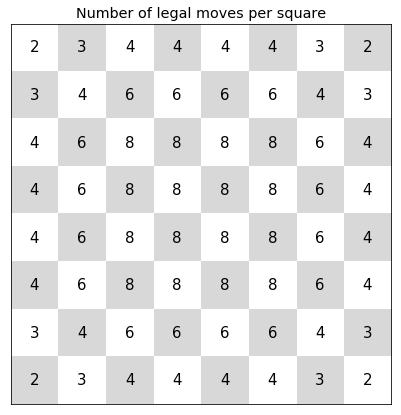

In [155]:
from visualisers import plot_board

def possibleMoves(X, Y):
    return len([(X + x, Y + y) for x, y in deltas     
                if (0 <= X + x < 8) and (0 <= Y + y < 8)])
deltas = KT.deltas

plot_board(8, possibleMoves, 'Number of legal moves per square')

## Desicion Making Warnsdoff's Rule

## Desicion Draws

In case of a draw in a successors next number of possible moves Warnsdoffs Rule dosen't really suggest much apart from random selection.

### Euclidean Distance

Using pretty much the same equation as Pythagorean theorem, this is found as follows:

$$d(p,q) = \sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2}$$


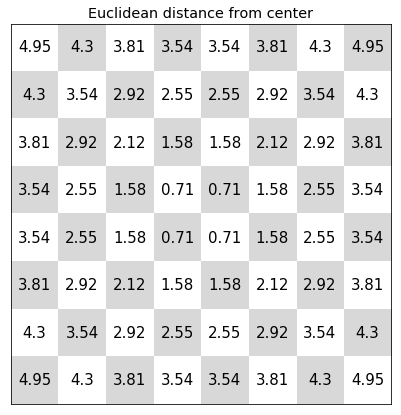

In [157]:
import math
def euclideanDistance(x,y):
    center = float(size-1) / 2
    return round(math.sqrt((x - center)**2 + (y - center)**2),2)

size = 8
plot_board(8, euclideanDistance, 'Euclidean distance from center')

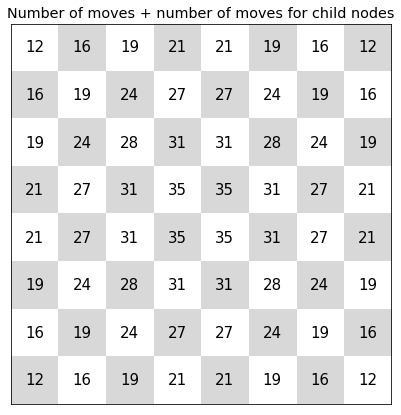

In [114]:
def pholDescision(X, Y):
    pholDescision.visited = []
    def possibleMoves(X, Y):
        possible = ([(X + x, Y + y) for x, y in deltas     
                    if  (0 <= X + x < 8) and (0 <= Y + y < 8)
                    and (X + x, Y + y) not in pholDescision.visited])
        pholDescision.visited += possible
        return possible
    P = possibleMoves(X, Y)
    return (len(P) + sum([len(possibleMoves(x, y)) for x, y in P]))

plot_board(8, pholDescision, 'Number of moves + number of moves for child nodes')

## Success Rate


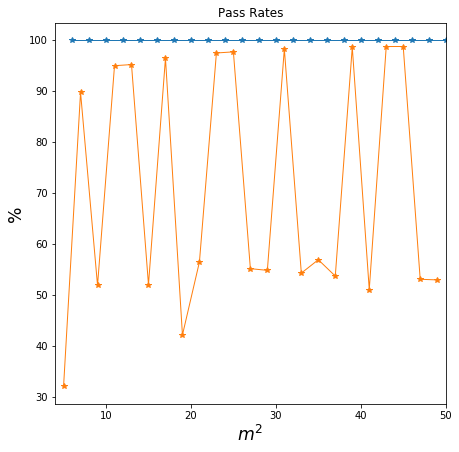

In [154]:
a = [d["_FAIL COUNT"] for d in data[1::2]]
b = [d["_TEST COUNT"] for d in data[1::2]]
_n = [d["_N"] for d in data[1::2]]

a2 = [d["_FAIL COUNT"] for d in data[0::2]]
b2 = [d["_TEST COUNT"] for d in data[0::2]]
_n2 = [d["_N"] for d in data[0::2]]
# PR = list(np.array(Test_counts)-np.array(Fail_counts))

PR = [(float(a_i if a_i else b_i) / b_i) * 100 for a_i, b_i in zip(a, b)]
PR2 = [(float(a_i if a_i else b_i) / b_i) * 100 for a_i, b_i in zip(a2, b2)]
plt.figure(figsize=(7,7))
plt.title('Pass Rates', size='large')
plt.xlim([4,50])
plt.ylabel('%', size='xx-large')
plt.xlabel(r'$m^2$', size='xx-large')
plt.plot(_n, PR, '*-', linewidth=1)
plt.plot(_n2, PR2, '*-', linewidth=1)
plt.show()

## Test Fails


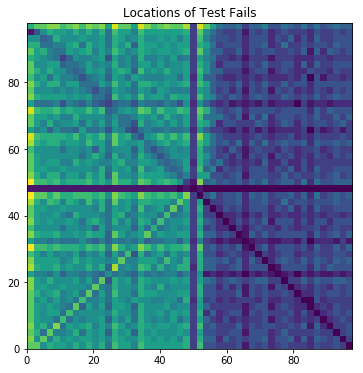

In [122]:
FAILS = [d["_FALSE STARTS"] for d in data if not d["_PASS"]]
_n = [d["_N"] for d in data if not d["_PASS"]]
Fx = []
Fy = []
for i, n in enumerate(_n):
    for x, y in FAILS[i]:
        R1 = float(x) / n
        R2 = float(y) / n
        Fx.append(round(R1 * 100, 2))
        Fy.append(round(R2 * 100, 2))

plt.figure(figsize=(6,6))
heatmap, xedges, yedges = np.histogram2d(Fx, Fy, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent)
plt.title('Locations of Test Fails', size='large')
plt.show()

## Solve Times

Execution times required to find a solution on a given board increased linearly. Averages were taken for each possible start position availible on the board. $T(n^2)$ where $n^2$ is the number of squares on the board.

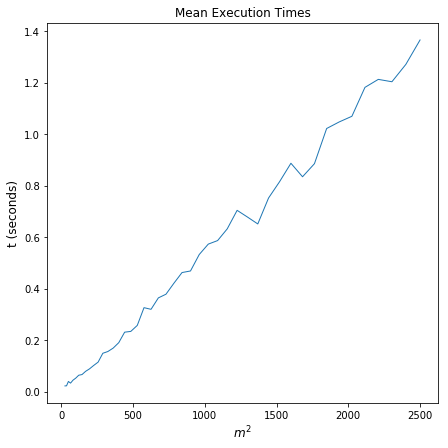

In [153]:
times = [d["_AVG TIME"] for d in data]
n = [d["_N"]**2 for d in data]

plt.figure(figsize=(7,7))
plt.title('Mean Execution Times', size='large')
plt.ylabel('t (seconds)', size='large')
plt.xlabel(r'$m^2$', size='large')
plt.plot(n, times, '-', linewidth=1)
plt.show()

## Python Implementation

```python

import math

def knightsTour(start, size=8):
    """Takes tuple and integer as input; returns a vaild knights tour or fails 
    from a give start position on a n x n chessboard.
    knightsTour((x,y), n) -> [(x,y), (x1,y1), (x2,y2), ...]"""
    knightsTour.size = size 
    goalState = size**2
    try: # check function is called with valid start position
        sX, sY = start
        assert (0 <= sX < knightsTour.size)
        assert (0 <= sY < knightsTour.size)
    except AssertionError:
        raise AssertionError(
                "Start position must be within bounds of board size",
                "based on zero based indcies; range = 0 to n-1"
            ) 
    return DFSearch(nodeSuccessors, sortedNodes, start)
```

### Depth First Search


```python
def DFSearch(graph, heuristic, node, path=[]):
    """Takes Tuple and list of tuples; variation of a depth-first-search
    optimised by Warnsdoffs rule. """ 
    DFSearch.path = path 
    DFSearch.branches = []
    backtracks = set()
    while node not in DFSearch.path:
        DFSearch.path.append(node)
        if len(DFSearch.path) == knightsTour.size **2:
            return DFSearch.path
        successors = graph(node)
        if successors: 
            node = heuristic(successors)
        elif DFSearch.branches:
            oldChoice, newChoice = DFSearch.branches.pop()
            while newChoice not in backtracks and DFSearch.branches:
                oldChoice, newChoice = DFSearch.branches.pop()
            backtracks.add(newChoice)
            DFSearch.path = DFSearch.path[:DFSearch.path.index(oldChoice)]
            node = newChoice

    return FAIL
    
FAIL = []
```

### Successor Function (Graph)


```python
def nodeSuccessors(node):
    """Takes tuple as input; returns list of valid moves from the current 
    position. A valid move is defined as a delta increment that is within
    the bounds of the board and not already in our explored path.
    nodeSuccessors( (x, y) ) -> [(x1, y1), (x2, y2), ...]"""
    X, Y = node
    return ([(X + x, Y + y) for x, y in deltas      
              if  (0 <= X + x < knightsTour.size)                  
              and (0 <= Y + y < knightsTour.size)                  
              and not (X + x, Y + y) in DFSearch.path]) 

deltas = [(-2, 1), (-2,-1), (-1,-2), ( 1,-2), # possible moves by increment
          ( 2,-1), ( 2, 1), ( 1, 2), (-1, 2)] # that a knight peice can make.

```
### Sorting Hueristic


```python
def sortedNodes(nodes):
    ""
    sortedN = sorted([(len(nodeSuccessors(n)), n) for n in nodes])
    sortedN = [n for rank, n in sortedN if rank == sortedN[0][0]]
    if len(sortedN) != 1:
        sortedN.sort(key=euclideanDistance, reverse=True)
        choices = [(sortedN[0], node) for node in sortedN[1:]]
        DFSearch.branches += choices
    return sortedN[0]


def euclideanDistance(node):
    "returns Euclidean distance from center of board"
    p1, p2 = node
    center = float(knightsTour.size-1) / 2
    return round(math.sqrt((p1 - center)**2 + (p2 - center)**2),2)
    
```